# Import libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Read data

In [ ]:
data = pd.read_csv("a1_b1_c1.csv")
# data = pd.read_csv("a1_b1_c2.csv")
# data = pd.read_csv("a1_b2_c1.csv")
# data = pd.read_csv("a1_b2_c2.csv")

# Train test split

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

# split into input (X) and output (Y) variables
X = data.iloc[:,data.columns != 'isFraud']
Y = data['isFraud']
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Prediction with Random Forest

Train Accuracy score: 0.98000
Train ROC score: 0.96970
Test Accuracy score: 0.97750
Test ROC score: 0.96154


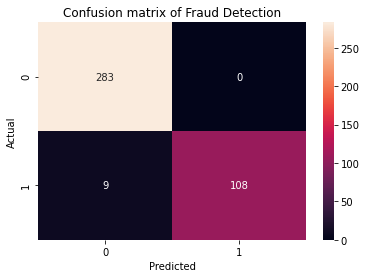

In [ ]:
clf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=1, n_estimators=100, random_state=1)
clf.fit(scaled_X_train, y_train)

# Predict train set
y_pred_train = clf.predict(scaled_X_train)
acc_train = accuracy_score(y_train, y_pred_train)
roc_train = roc_auc_score(y_train, y_pred_train)
print('Train Accuracy score: {0:0.5f}' .format(acc_train))
print('Train ROC score: {0:0.5f}' .format(roc_train))

# Predict test set
y_pred_test = clf.predict(scaled_X_test)
acc_test = accuracy_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_pred_test)
print('Test Accuracy score: {0:0.5f}' .format(acc_test))
print('Test ROC score: {0:0.5f}' .format(roc_test))

# Plot confusion matrix for test
confuse_rf = confusion_matrix(y_test, y_pred_test)
confuse_rf
fig = plt.figure()
sns.heatmap(confuse_rf, annot = True, fmt='d')
plt.title("Confusion matrix of Fraud Detection")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# store best results for svm
%store confuse_rf

# Feature Importance

In [ ]:
RF = clf
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature (Column index) 5 (0.330000)
2. feature (Column index) 8 (0.280000)
3. feature (Column index) 2 (0.100000)
4. feature (Column index) 6 (0.090000)
5. feature (Column index) 0 (0.080000)
6. feature (Column index) 1 (0.060000)
7. feature (Column index) 4 (0.030000)
8. feature (Column index) 9 (0.020000)
9. feature (Column index) 3 (0.010000)
10. feature (Column index) 7 (0.000000)


In [ ]:
list(X_train.columns) 

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'same_value',
 'CASH_OUT',
 'DEBIT',
 'PAYMENT',
 'TRANSFER']

# Gridsearch CV

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier() 

# Define hyperparameters and grid search
param_grid = { 
    'n_estimators': [10, 100, 500, 1000],
    'bootstrap': [True, False],
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

CPU times: user 2min 49s, sys: 673 ms, total: 2min 50s
Wall time: 2min 50s


In [ ]:
# get best score
grid_search.best_score_

0.9800000000000001

In [ ]:
# get best parameters
grid_search.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}

In [ ]:
# display search results
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by=['rank_test_score'], inplace=True)
df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,1.143828,0.002446,0.066412,0.000906,True,entropy,5,1000,"{'bootstrap': True, 'criterion': 'entropy', 'm...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
57,0.083328,0.001402,0.007582,0.000178,False,gini,5,100,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
56,0.009646,0.000141,0.001457,0.000013,False,gini,5,10,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
55,0.823771,0.009010,0.066362,0.000663,False,gini,4,1000,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
54,0.416522,0.012706,0.033704,0.000705,False,gini,4,500,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
53,0.083335,0.000502,0.007472,0.000110,False,gini,4,100,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
52,0.009497,0.000225,0.001517,0.000100,False,gini,4,10,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
51,0.814930,0.007675,0.066689,0.000946,False,gini,3,1000,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
58,0.412924,0.004697,0.034144,0.000673,False,gini,5,500,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1
50,0.408233,0.002267,0.034771,0.002499,False,gini,3,500,"{'bootstrap': False, 'criterion': 'gini', 'max...",1.0,1.0,1.0,0.9,1.0,0.98,0.04,1


In [ ]:
# save results as a csv file
df.to_csv('RF_cv_result_2.csv')